In [31]:
import deap as dp
import array
import random
import json
import pandas as pd
import numpy as np
%matplotlib inline
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

In [32]:
# gr*.json contains the distance map in list of list style in JSON format
# Optimal solutions are : gr17 = 2085, gr24 = 1272, gr120 = 6942
with open("gr17.json", "r") as tsp_data:
    tsp = json.load(tsp_data)

distance_map = tsp["DistanceMatrix"]
IND_SIZE = tsp["TourSize"]

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)


In [33]:
toolbox = base.Toolbox()

# Attribute generator
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE)

# Structure initializers
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalTSP(individual):
    distance = distance_map[individual[-1]][individual[0]]
    for gene1, gene2 in zip(individual[0:-1], individual[1:]):
        distance += distance_map[gene1][gene2]
    return distance,

toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.25)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalTSP)

In [34]:
# main() exposed

random.seed(169)

pop = toolbox.population(n=1000)

hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

result_object=algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 40, stats=stats, 
                    halloffame=hof)

gen	nevals	avg    	std    	min 	max 
0  	1000  	4676.62	425.366	3237	5842
1  	775   	4479.97	405.351	3237	5712
2  	762   	4398.73	433.471	3140	5774
3  	766   	4356.53	452.247	3140	5685
4  	724   	4277.32	480.959	2990	5576
5  	753   	4235.38	489.009	2651	5504
6  	773   	4238.96	507.88 	2651	5702
7  	799   	4204.28	515.649	2996	5698
8  	744   	4192.61	541.889	2832	5649
9  	760   	4187.06	538.611	2978	5720
10 	757   	4144.7 	540.429	2701	5727
11 	767   	4124.57	546.849	2902	5698
12 	751   	4099.36	533.955	2531	5752
13 	747   	4125.64	546.364	2531	5755
14 	769   	4140.45	558.537	2531	5828
15 	772   	4132.1 	542.323	2531	5636
16 	741   	4084.66	543.669	2531	5567
17 	756   	4080.64	545.309	2531	5548
18 	751   	4078.04	567.514	2531	5793
19 	747   	4079.86	566.125	2531	5600
20 	779   	4053.36	552.848	2531	5702
21 	757   	4051.01	573.092	2531	5556
22 	797   	4061.31	584.377	2476	5884
23 	749   	4016.79	585.285	2531	5741
24 	755   	4008.42	596.45 	2751	5574
25 	741   	3966.01	595.641	2459	5848
2

In [35]:
result_object[1][1]['std']

405.35089887158261

In [36]:
type(result_object[1][1])

dict

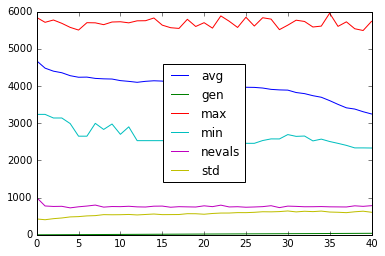

In [37]:
pd.DataFrame(data=result_object[1]).plot()

In [38]:
pd.DataFrame(data=result_object[1]).to_csv

<bound method DataFrame.to_csv of          avg  gen     max     min  nevals         std
0   4676.623    0  5842.0  3237.0    1000  425.365552
1   4479.972    1  5712.0  3237.0     775  405.350899
2   4398.733    2  5774.0  3140.0     762  433.470815
3   4356.531    3  5685.0  3140.0     766  452.246646
4   4277.321    4  5576.0  2990.0     724  480.958803
5   4235.384    5  5504.0  2651.0     753  489.008665
6   4238.956    6  5702.0  2651.0     773  507.879535
7   4204.276    7  5698.0  2996.0     799  515.649464
8   4192.606    8  5649.0  2832.0     744  541.889209
9   4187.056    9  5720.0  2978.0     760  538.610916
10  4144.699   10  5727.0  2701.0     757  540.428527
11  4124.569   11  5698.0  2902.0     767  546.848622
12  4099.365   12  5752.0  2531.0     751  533.955357
13  4125.644   13  5755.0  2531.0     747  546.363538
14  4140.449   14  5828.0  2531.0     769  558.536962
15  4132.104   15  5636.0  2531.0     772  542.323145
16  4084.658   16  5567.0  2531.0     741  543.6

In [39]:
result_object[1][3]

{'avg': 4356.5309999999999,
 'gen': 3,
 'max': 5685.0,
 'min': 3140.0,
 'nevals': 766,
 'std': 452.24664624406006}

In [40]:
df = pd.DataFrame().from_dict(result_object[1])

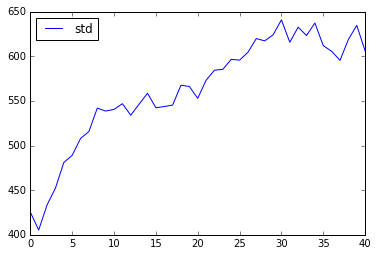

In [41]:
df.plot(y='std')

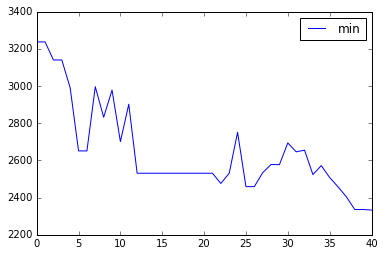

In [42]:
df.plot(y='min')

In [43]:
pop

[array('i', [2, 13, 7, 0, 12, 15, 8, 11, 3, 14, 10, 9, 1, 4, 5, 16, 6]),
 array('i', [15, 8, 7, 11, 13, 10, 6, 0, 16, 1, 3, 9, 14, 4, 2, 5, 12]),
 array('i', [6, 7, 2, 14, 15, 5, 11, 13, 8, 16, 10, 9, 1, 4, 3, 12, 0]),
 array('i', [6, 13, 8, 9, 3, 12, 14, 7, 11, 5, 10, 16, 0, 4, 1, 2, 15]),
 array('i', [8, 11, 15, 3, 12, 10, 0, 7, 2, 14, 16, 9, 1, 4, 6, 5, 13]),
 array('i', [12, 11, 6, 2, 8, 5, 15, 10, 13, 14, 4, 9, 1, 7, 16, 0, 3]),
 array('i', [8, 11, 3, 15, 12, 7, 16, 13, 2, 14, 10, 9, 1, 4, 5, 6, 0]),
 array('i', [14, 11, 15, 8, 2, 7, 12, 0, 5, 6, 1, 9, 10, 4, 13, 3, 16]),
 array('i', [6, 10, 11, 12, 7, 13, 3, 16, 2, 14, 15, 9, 1, 4, 8, 5, 0]),
 array('i', [12, 3, 11, 15, 13, 16, 8, 5, 0, 14, 10, 9, 1, 4, 6, 2, 7]),
 array('i', [8, 11, 15, 0, 5, 3, 6, 12, 7, 14, 10, 9, 1, 4, 13, 2, 16]),
 array('i', [8, 15, 11, 7, 16, 13, 5, 12, 2, 14, 10, 9, 1, 4, 6, 0, 3]),
 array('i', [8, 13, 7, 0, 6, 15, 12, 11, 16, 14, 10, 9, 1, 4, 2, 5, 3]),
 array('i', [12, 3, 0, 16, 6, 8, 7, 13, 2, 14, 10, 

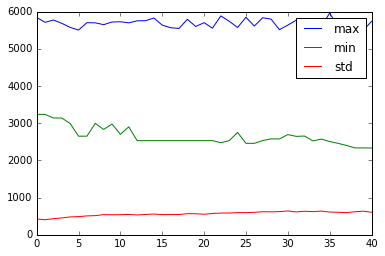

In [44]:
df.plot(y=['max','min','std'])

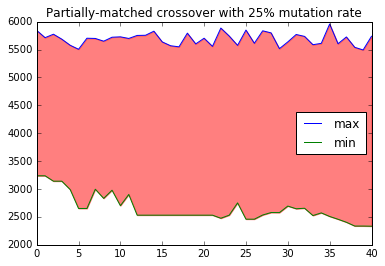

In [45]:
a=df.plot(y=['max','min'],title='Partially-matched crossover with 25% mutation rate').fill_between(xrange(0,41),df['min'],df['max'],color='red',alpha='0.5')
